In [1]:
import pandas as pd
import numpy as np
from readFile import split_into_values, toRPdata
# # columns 와 value는 사용자 입력
# df = pd.read_csv('resources/CLAMP_resample.csv')
# columns = ['chip', 'wire', 'segment']
# value = ['value']
# #df = pd.read_csv('resources/Dataset1.csv')
# #columns = ['Process', 'Step']
# #value = ['Value']

# df = df.loc[:, columns + value] #('chip', 'wire', 'value')는 사용자 입력
# result = split_into_values(df, columns)
# result

In [2]:
data = [
    [ 
        [5,8,2,2],
        [5,2,4,6,5,4,3,7,7,8,7,4],
        [4,11,2,1,2,7],
        [7,4,5,7,4,0,7,2,3,1]
    ],
    [
        [4,5,3,4,4,4,2,0,6,2],
        [4,4,0,9],
        [2,4,3,5,3,3,6,7,3,8],

    ],
    [
        [4,2,3,2,4,3,4],
        [7,6,5,6,6,5,4],
        [3,2,3,4,5,4],
        [4,4,0,9],
        [2,4,3,5,3,3,6,7,3,8],
        [5,4,5,5]
    ],
    [
        [1,2,6,2,3,3,1],
        [2,6,4,6,6,3,4],
        [4,2,8,3,5,7],
        [5,4,5,5],
        [4,3,4,8,9,2,2,2]
    ]
]

In [3]:
len(data)

4

In [4]:
#시계열셋 최소 길이 리스트형태로 담음
min_lens=[]
data_len=len(data)
for i in range(0,data_len):
    min=len(data[i][0])
    for j in range(0,len(data[i])):
        if len(data[i][j]) < min:
            min = len(data[i][j])
    min_lens.append(min)
min_lens

[4, 4, 4, 4]

In [5]:
#시계열 셋 길이 통일
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

result_re=[]
for i in range(0,data_len):
    result_ = TimeSeriesResampler(sz=min_lens[i]).fit_transform(data[i])
    result_=result_.reshape(len(data[i]),min_lens[i])
    result_re.append(result_)
result_re

[array([[5.        , 8.        , 2.        , 2.        ],
        [5.        , 5.33333333, 7.        , 4.        ],
        [4.        , 5.        , 1.33333333, 7.        ],
        [7.        , 7.        , 7.        , 1.        ]]),
 array([[4., 4., 2., 2.],
        [4., 4., 0., 9.],
        [2., 5., 6., 8.]]),
 array([[4.        , 3.        , 4.        , 4.        ],
        [7.        , 5.        , 6.        , 4.        ],
        [3.        , 2.66666667, 4.33333333, 4.        ],
        [4.        , 4.        , 0.        , 9.        ],
        [2.        , 5.        , 6.        , 8.        ],
        [5.        , 4.        , 5.        , 5.        ]]),
 array([[1.        , 6.        , 3.        , 1.        ],
        [2.        , 4.        , 6.        , 4.        ],
        [4.        , 6.        , 3.66666667, 7.        ],
        [5.        , 4.        , 5.        , 5.        ],
        [4.        , 5.33333333, 4.33333333, 2.        ]])]

In [6]:
#수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
result_norm=[]
for i in range(0, data_len):
    norm = StandardScaler().fit_transform(result_re[i])
    result_norm.append(norm)
    
result_norm

[array([[-0.22941573,  1.36082763, -0.87160193, -0.65465367],
        [-0.22941573, -0.81649658,  0.99611649,  0.21821789],
        [-1.14707867, -1.08866211, -1.12063105,  1.52752523],
        [ 1.60591014,  0.54433105,  0.99611649, -1.09108945]]),
 array([[ 0.70710678, -0.70710678, -0.26726124, -1.40182605],
        [ 0.70710678, -0.70710678, -1.06904497,  0.86266219],
        [-1.41421356,  1.41421356,  1.33630621,  0.53916387]]),
 array([[-0.10599979, -1.06043086, -0.10927167, -0.81110711],
        [ 1.8019964 ,  1.18518744,  0.87417338, -0.81110711],
        [-0.74199852, -1.43470058,  0.05463584, -0.81110711],
        [-0.10599979,  0.06237829, -2.07616179,  1.62221421],
        [-1.37799724,  1.18518744,  0.87417338,  1.13554995],
        [ 0.52999894,  0.06237829,  0.38245086, -0.32444284]]),
 array([[-1.4969104 ,  1.03209369, -1.34438724, -1.31122014],
        [-0.81649658, -1.17953565,  1.53644256,  0.09365858],
        [ 0.54433105,  1.03209369, -0.70420284,  1.4985373 ],
  

In [7]:
#주성분 분석 실시하기
from sklearn.decomposition import PCA

#PCA 객체 생성 (주성분 갯수 2개 생성)
pca = PCA(n_components=2)
result_pca=[]
for i in range(0,data_len):
    pca_ = pca.fit_transform(result_norm[i])
    result_pca.append(pca_)

result_pca

[array([[-0.50280411,  1.6696733 ],
        [ 0.22411085, -1.23184462],
        [ 2.44810224,  0.03589788],
        [-2.16940899, -0.47372656]]),
 array([[-1.27678337, -1.18590432],
        [-1.18808636,  1.21469913],
        [ 2.46486974, -0.02879481]]),
 array([[-0.31254508,  1.30608728],
        [-2.03378871, -1.16721038],
        [-0.05128314,  1.71208106],
        [ 2.27155308, -0.33365151],
        [ 0.82556172, -1.43030001],
        [-0.69949787, -0.08700643]]),
 array([[ 2.51153879, -0.68572596],
        [-1.28605   , -1.49239806],
        [ 0.20241319,  1.90112661],
        [-1.74316801,  0.32510741],
        [ 0.31526602, -0.04811   ]])]

In [8]:
len(result_pca[2])

6

4

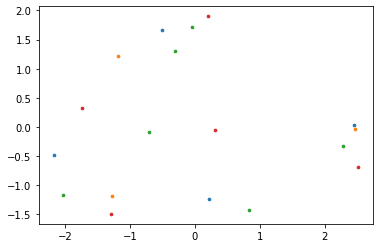

In [11]:
import matplotlib.pyplot as plt
num=0
for i in range(0,data_len):
    plt.scatter(result_pca[i][:,0], result_pca[i][:,1],s=7)

